# Projeto 2

## Gustavo Pinheiro de Carvalho
## Engenharia 2C

Predição de uma variável principal em função de demais outras variáveis que podem influenciar em seu comportamento.

<div id="erupcoes"></div>

# <font color='blue'>Base de Dados: Carros elétricos no estado de Washington, nos Estados Unidos.</font> 

   A base de dados `"Electric_Vehicle_Population_Data.csv"` agrupa todos os carros hibrídos e elétricos do estado de Washington, nos Estados Unidos, com números atualizados pela última vez no dia 12 de Novembro de 2020. 
   Nela consta:

Chassis dos carros (VIN);

Lugar onde foram documentados (County, City, State);

Ano do modelo (Model Year);

Marcas (Make);

Modelos (Model);

Tipo de veículo (Electric Vehicle Type);

Autonômia da bateria (Electric Range);

Preço de compra (Base MSRP);

In [22]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats

In [23]:
print(os.getcwd())

/Users/gustavopinheiro/P2-CD20-2


In [24]:
# Lendo o arquivo csv
dados = pd.read_csv('Electric_Vehicle_Population_Data.csv')

dados

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location
0,KNDCE3LG3L,King,RENTON,WA,98059,2020,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,0,11.0,128569878,POINT (-122.132064 47.494834)
1,KNDCE3LG9K,King,SEATTLE,WA,98108,2019,KIA,NIRO ELECTRIC,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,38500,37.0,105987073,POINT (-122.31336800000001 47.54411)
2,KNDCC3LG5L,King,RENTON,WA,98057,2020,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,0,37.0,114300301,POINT (-122.215501 47.476576)
3,1G1FY6S00K,Thurston,YELM,WA,98597,2019,CHEVROLET,BOLT,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,36620,2.0,113112303,POINT (-122.558621 46.888349)
4,1N4AZ0CP6F,Chelan,LEAVENWORTH,WA,98826,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,29010,12.0,330944169,POINT (-120.73040299999998 47.74993200000001)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62256,1N4AZ0CP9D,Whatcom,BELLINGHAM,WA,98225,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,28800,42.0,193481781,POINT (-122.493388 48.74995)
62257,5YJ3E1EB7L,Snohomish,MOUNTLAKE TERRACE,WA,98043,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,1.0,110482445,POINT (-122.30655200000001 47.792041)
62258,5YJ3E1EB7L,Mason,SHELTON,WA,98584,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,35.0,7998637,POINT (-123.09921000000001 47.225326)
62259,WBY1Z4C56E,King,SEATTLE,WA,98105,2014,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,72,41350,46.0,219922678,POINT (-122.298657 47.663771)


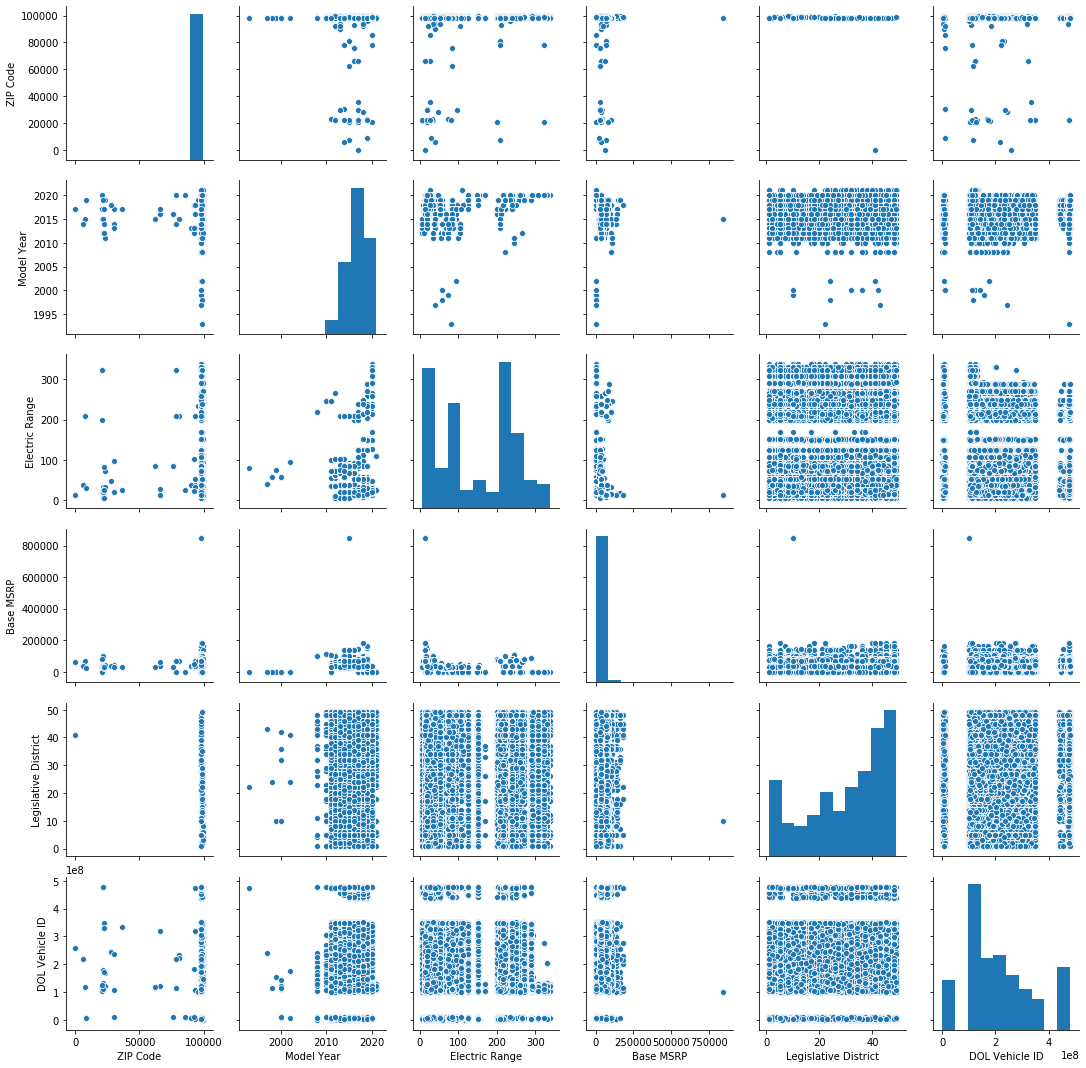

In [25]:
sns.pairplot(dados)

## Tirando as colunas classificadas como outliers:

In [26]:
# Tirando as colunas classificadas como outliers
dados = dados.drop(columns=['VIN (1-10)'])
dados = dados.drop(columns=['County'])
dados = dados.drop(columns=['City'])
dados = dados.drop(columns=['State'])
dados = dados.drop(columns=['ZIP Code'])
dados = dados.drop(columns=['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
dados = dados.drop(columns=['Legislative District'])
dados = dados.drop(columns=['DOL Vehicle ID'])
dados = dados.drop(columns=['Vehicle Location'])

dados

,Model Year,Make,Model,Electric Vehicle Type,Electric Range,Base MSRP
0,2020,KIA,NIRO,Battery Electric Vehicle (BEV),239,0
1,2019,KIA,NIRO ELECTRIC,Battery Electric Vehicle (BEV),239,38500
2,2020,KIA,NIRO,Battery Electric Vehicle (BEV),239,0
3,2019,CHEVROLET,BOLT,Battery Electric Vehicle (BEV),238,36620
4,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),84,29010
...,...,...,...,...,...,...
62256,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),75,28800
62257,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),322,0
62258,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),322,0
62259,2014,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),72,41350


In [27]:
carros_eletricos = dados.loc[dados['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)',:]
carros_eletricos = carros_eletricos.drop(carros_eletricos[carros_eletricos['Base MSRP'] <= 0].index)

#carros_eletricos.drop(columns=['VIN (1-10)']) #,'County','City','State', 'ZIP Code', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location'])
carros_eletricos

,Model Year,Make,Model,Electric Vehicle Type,Electric Range,Base MSRP
1,2019,KIA,NIRO ELECTRIC,Battery Electric Vehicle (BEV),239,38500
3,2019,CHEVROLET,BOLT,Battery Electric Vehicle (BEV),238,36620
4,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),84,29010
6,2017,CHEVROLET,BOLT,Battery Electric Vehicle (BEV),238,37495
8,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),150,29990
...,...,...,...,...,...,...
62251,2018,CHEVROLET,BOLT,Battery Electric Vehicle (BEV),238,37495
62252,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),220,35000
62254,2017,NISSAN,LEAF,Battery Electric Vehicle (BEV),107,30680
62256,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),75,28800


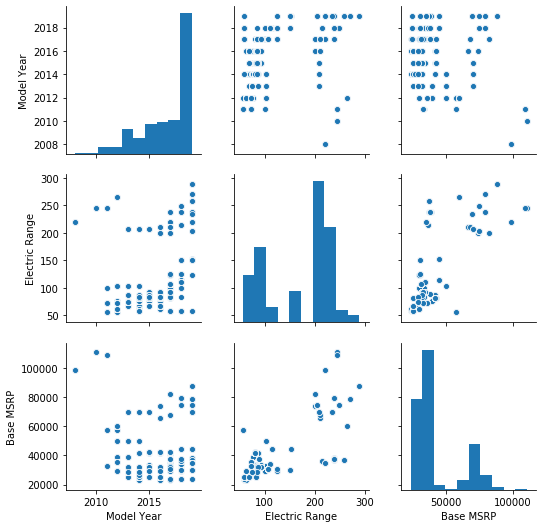

In [28]:
sns.pairplot(carros_eletricos)

# Objetivo do projeto

### O objetivo desse projeto será prever uma variável principal em função de demais outras variáveis que podem influenciar em seu comportamento.
 
   Nesse caso, utilizaremos o valor de compra para a nossa variável target. Ou seja, nesse projeto desejamos prever um valor de compra para um novo carro elétrico que será introduzido no mercado no estado de Washington baseado em outras variáveis como a autonômia da bateria, o ano do modelo e o fabricante.

# Modelo de Regressão Linear

A análise de regressão estuda a relação entre uma variável chamada de 'variável dependente' e outras variáveis chamadas de 'variáveis independentes'.

Este modelo é designado por modelo de regressão linear simples (MRLS) se define uma relação linear entre a variável dependente e uma variável independente.

*Y* : variável dependente (resposta) - variável obrigatoriamente quantitativa, cujo comportamento se deseja explicar (efeito).

*X* : variável independente (explicativa) - variável ou variáveis que são utilizadas para explicar a variável dependente.

*Modelo de regressão linear simples*: modelo que associa *Y* em
função de uma variável explicativa *X*.

# Modelo do projeto:

## Problema:

Desejamos prever o valor de compra de um novo carro no estado de Washington, nos Estados Unidos (Base MSRP) em funçao da autonômia do carro (Electric Range).

### Y : variável dependente (resposta): Base MSRP
### X : variável independente (explicativa): Electric Range

### Portanto, o modelo do projeto fará uma associação de Y em função de uma variável explicativa X

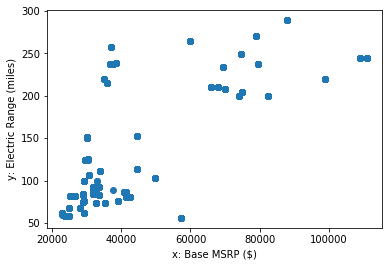

In [29]:
x_dados = carros_eletricos['Base MSRP'] # Definindo renda como explicativa
y_dados = carros_eletricos['Electric Range']    # Definindo CO2 como resposta

plt.scatter(x_dados,y_dados);
plt.xlabel("x: Base MSRP ($)");
plt.ylabel("y: Electric Range (miles)");

# Análise do gráfico:

Analisando o gráfico, percebemos uma a existência de uma correlação positiva entre as duas variáveis.

## Coeficiente de correlação linear:
 Designamos de coeficiente de correlação linear:
 
$$\hat{\beta}_0=\bar{y}-\hat{\beta}_1\bar{x}$$

$$\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}$$

$$\frac{\sum_{i=1}ˆn(x_i\y_i)-\n\bar{x}\bar{y}}{\

Este coeficiente é uma medida do grau de dependência linear entre as duas variáveis, X e Y .

Se −1 ≤ r ≤ 1;

* r = 1: relação linear perfeita (e positiva) entre X e Y ;

* r = 0: inexistência de relação linear entre X e Y ;

* r = −1: relação linear perfeita (e negativa) entre X e Y ; 

* r > 0: relação linear positiva entre X e Y ;

* r < 0: relação linear negativa entre X e Y .

## Projeto:
    

In [30]:
x_dados = carros_eletricos['Base MSRP']
y_dados = carros_eletricos['Electric Range']

x_barra = x_dados.mean() 
y_barra = y_dados.mean()

numer = (x_dados*y_dados - x_barra*y_barra).sum()
denom = ((x_dados**2 - x_barra**2).sum()*(y_dados**2 - y_barra**2).sum())**0.5

r = numer/denom

r

0.532418747469085

Portanto, possuimos uma relação linear positiva entre X e Y, já que *r > 0*.

In [44]:
# ESCREVA SEU CÓDIGO AQUI
x_dados = carros_eletricos['Base MSRP'] # Definindo renda como explicativa
y_dados = carros_eletricos['Electric Range']    # Definindo CO2 como resposta

#
x_barra = x_dados.mean() 
y_barra = y_dados.mean()

x_dados - x_barra

1        -4239.531668
3        -6119.531668
4       -13729.531668
6        -5244.531668
8       -12749.531668
             ...     
62251    -5244.531668
62252    -7739.531668
62254   -12059.531668
62256   -13939.531668
62260    27160.468332
Name: Base MSRP, Length: 36299, dtype: float64

In [45]:
# Outra maneira de obter o coeficiente angular, pois Sxy/Sxx = Cov(x, y)/Var(x)
x_dados.cov(y_dados)/x_dados.var()
print(f'Coeficiente angular betaˆ1 = {x_dados.cov(y_dados)/x_dados.var():.5f}')

Coeficiente angular betaˆ1 = 0.00198


In [46]:
Sxy = ((x_dados - x_barra)*(y_dados - y_barra)).sum()
Sxx = ((x_dados - x_barra)**2).sum()

b1 = Sxy/Sxx
b0 = y_barra - b1*x_barra

print(f'Coeficiente linear betaˆ0 = {b0:.5f}')
print(f'Coeficiente angular betaˆ1 = {b1:.5f}')

print(f'y^ = {b0:.5f} + {b1:.5f}x')

Coeficiente linear betaˆ0 = 87.22344
Coeficiente angular betaˆ1 = 0.00198
y^ = 87.22344 + 0.00198x


<div id="verificando-resultados"></div>

### Verificando os resultados da regressão

Vamos contrastar a reta estimada pelo modelo de regressão com os dados observados.

Para tanto, serão construídos:
 * `x_vec`: vetor de valores considerando a amplitude dos dados que estão no `eixo x`
 * `y_vec`: vetor com valores ajustados para y a partir de um valor de `x_vec`, considerando os coeficentes da reta

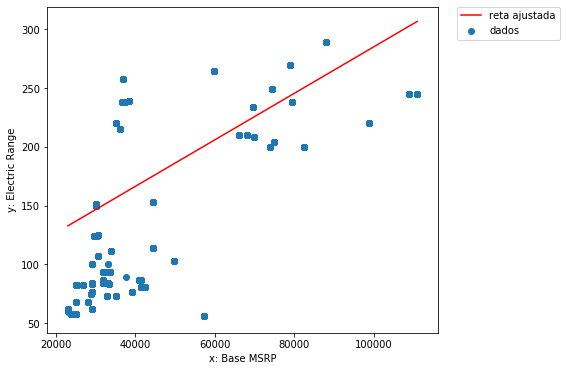

In [47]:
x_vec = np.linspace(x_dados.min(), x_dados.max(), 500)
y_vec = b0 + b1*x_vec

plt.figure(figsize=(7,6))
plt.plot(x_vec,y_vec, color="r") # resultados da regressão
plt.scatter(x_dados, y_dados); # dados
plt.xlabel("x: Base MSRP")
plt.ylabel("y: Electric Range")
plt.legend(('reta ajustada','dados'), bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

# Resíduos: 


In [48]:
residuos = y_dados - (b0 + b1*x_dados)

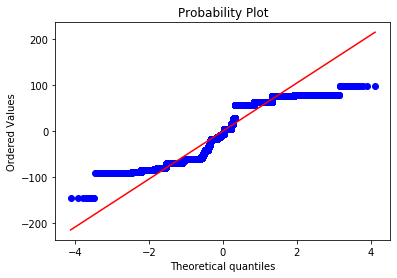

In [49]:
y_predito = b0 + b1*x_dados
residuos = y_dados - y_predito

stats.probplot(residuos, dist='norm', plot=plt,);

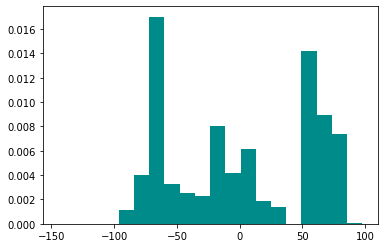

In [50]:
plt.hist(residuos, density=True, color='darkcyan', bins=20);

<div id="usando-ols"></div>

### Usando `statsmodels.OLS`

Agora que estão familiarizados com algumas medidas obtidas na "raça" calculando $\hat{beta}_0$ e $\hat{beta}_1$ com as expressões obtidas pelo método dos mínimos quadrados, vamos aprender como utilizar a função `OLS()` da biblioteca `statsmodel` e interpretar os resultados.

In [39]:
import statsmodels.api as sm # Importe da biblioteca

In [51]:
# Repetindo - mas já fizemos isso anteriormente
x_dados = carros_eletricos['Base MSRP'] # Definindo renda como explicativa
y_dados = carros_eletricos['Electric Range']    # Definindo CO2 como resposta

# Matriz de 1s e valores de x_dados
X_dados = sm.add_constant(x_dados) # Adiciona coluna de 1s para estimar intercepto junto com a coluna de x (dados)

In [52]:
# Define o modelo
model = sm.OLS(y_dados, X_dados)  #sm.OLS(variável target, matriz com as features)  

# Faz o ajuste
results = model.fit()   

# Mostra os resultados
results.summary()      

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Electric Range   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                 1.436e+04
Date:                Sun, 22 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:45:03   Log-Likelihood:            -1.9714e+05
No. Observations:               36299   AIC:                         3.943e+05
Df Residuals:                   36297   BIC:                         3.943e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         87.2234      0.763    114.307      0.000      85.728      88.719
Base MSRP      0.0020   1.65e-05    119.832      0.000       0.002       0.002
==============================================================================
Omnibus:                   210266.731   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3474.499
Skew:                          -0.000   Prob(JB):                         0.00
Kurtosis:                       1.484   Cond. No.                     1.22e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**AGORA USE A SAIDA do OLS Regression Results**

Como resultado do `statsmodels.OLS` obtivemos a tabela acima, que contém diversas informações e pode ser um pouco intimidadora em um primeiro contato. Inicialmente estamos interessados apenas nos valores de $\hat\beta_0$ (intercepto: `const`) e $\hat\beta_1$ (inclinação da reta: `Base MSRP`). Esses valores podem ser encontrados na coluna `coef` do *output* do OLS Regression Results. Posteriormente vamos entender algumas das outras informações disponíveis nesse resultado.

In [42]:
beta0 = results.params['const']
beta1 = results.params['Base MSRP']

print("Estimativa de beta0 (coeficente linear): {0}".format(beta0))
print("Estimativa de beta1 (coeficente angular): {0}".format(beta1))

Estimativa de beta0 (coeficente linear): 87.22344177092316
Estimativa de beta1 (coeficente angular): 0.001978811921517537



<div id="ex3"></div>

### EXERCÍCIO 3 - Plot da reta ajustada

Usando os resultados da equação obtida via `statsmodels`, plote novamente a reta ajustada sobre os pontos. 

**Dica 1**: você pode utilizar o `results.predict` (consulte a documentação).

**Dica 2**: para usar essa função você pode precisar do `sm.add_constant` (utilizado [aqui](usando-ols)).

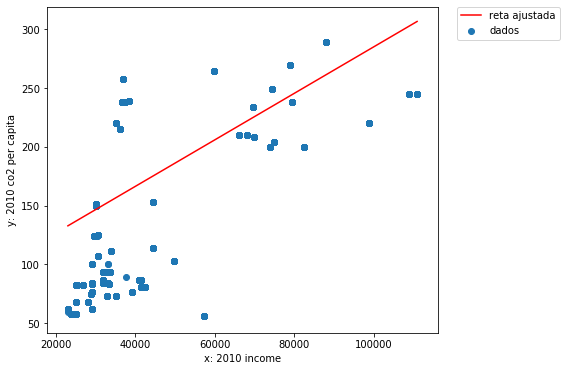

In [55]:
x_vec = np.linspace(x_dados.min(), x_dados.max(), 500)
y_vec = results.predict(sm.add_constant(x_vec))

plt.figure(figsize=(7,6))
plt.plot(x_vec,y_vec, color="r") # resultados da regressão
plt.scatter(x_dados, y_dados); # dados
plt.xlabel("x: 2010 income")
plt.ylabel("y: 2010 co2 per capita")
plt.legend(('reta ajustada','dados'), bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

<div id="ex4"></div>

### EXERCÍCIO 4 - Resíduos

Gere o `probplot` dos resíduos para verificar a sua normalidade.

**Dica**: Você pode obter o valor dos resíduos no atributo `resid` dos resultados da regressão (`results.resid`).

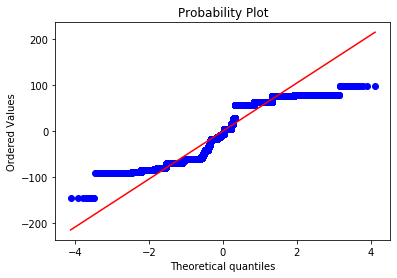

In [56]:
# ESCREVA SEU CÓDIGO AQUI
stats.probplot(results.resid, dist='norm', plot=plt);


<div id="ex5"></div>

### EXERCÍCIO 5 

Interprete os resultados acima. Você acha que os resíduos formam uma normal? Discuta a homocedasticidade do modelo (a variância dos erros é constante?).

* Pelo gráfico do exercício 4, os pontos fora da linha vermelha (bissetriz) mostram indícios de não adequação para modelar os resíduos.

* Pelo gráfico do exercício 3, observa-se um aumento de variabilidade dos pontos em torno da reta conforme os valores de x (renda per capita) aumentam. ???

<div id="explica"></div>

# Explicação sobre resultados e suposições do modelo de regressão linear:

Os resumo dos resultados da regressão traz informações que nos permitem avaliar a qualidade do ajuste e a validade de:

* Validação das suposições (normalidade, homocedasticidade e independência dos resíduos)
* Teste de hipóteses dos coeficientes do modelo de regressão 

<div id="testet"></div>

### Teste t :  valor-*p*  da estatística t

Existente para cada coeficiente $\beta_i$ do modelo de regressão, testam as seguintes hipóteses:

$H_0: \beta_i = 0$

$H_1: \beta_i \neq 0$

Um valor-*p* (encontrado na coluna `P>|t|`) baixo permite **rejeitar** a hipótese $H_0: \beta_i = 0$. No caso de um modelo de regressão simples, as hipóteses para o coeficiente $\beta_1$ dizem sobre a significância da regressão.

In [43]:
valorp_beta0 = results.pvalues['const']
valorp_beta1 = results.pvalues['Base MSRP']

print('Valor-p sob H0: beta0 = 0: {:.6f}'.format(valorp_beta0))
print('Valor-p sob H0: beta1 = 0: {:.6f}'.format(valorp_beta1))

Valor-p sob H0: beta0 = 0: 0.000000
Valor-p sob H0: beta1 = 0: 0.000000


<div id="r2"></div>

### Coeficiente de determinação $R^2$

É uma medida de quão bem uma regressão capta a variação presente nos dados, ou parafraseando, o quanto de variabilidade nos dados é explicada pelo modelo de regressão.

$$ R^2 = 1 - \frac{SS_E}{SS_T}$$

Para calcular esta fórmula precisamos das relações:

$$SQRes=SS_{E}=\sum\limits^{n}_{i=1}(y_i-\hat{y}_i)^2=\sum\limits_{i=1}^{n}\epsilon^2_{i}$$

$$SQT=SS_{T}=\sum\limits^{n}_{i=1}(y_i-\bar{y})^2$$

O valor de $R^2$ pode ser obtido na coluna `R-squared`.

### R-squared: 0.283




<div id="r2adj"></div>

### $R^2$ ajustado

Penaliza preditores que não acrescentam poder preditivo significativo. Essa medida é útil em modelo de regressão múltipla.

$$R^2ajustado = R^2 - (1-R^2)\frac{P}{n-p-1}$$

em que $n$ é o número de dados e $p$ é o número de preditores (número de variáveis explicativas)

O valor de $R^2$ ajustado pode ser obtido na coluna `Adj. R-squared`.

### Adj. R-squared: 0.283



<div id="f"></div>

### Estatística F

Testa as seguintes hipóteses:

$H_0: \beta_1 = \beta_2 = \ldots = \beta_p = 0$

$H_1: \beta_i \neq 0$ para no mínimo algum $i$, com $i=1,\ldots,n$ 

A rejeição da hipótese nula implica que no mínimo uma variável explicativa (regressora) contruibui significantemente para o modelo. Esse teste F é mais útil no caso de modelo de regressão múltipla.

O valor p dessa estatística pode ser obtido na coluna `Prob (F-statistic)`. Se ele for menor do que o nível de significância escolhido, rejeitamos $H_0$ em favor de $H_1$ (alguma variável explicativa contribui significativamente para o modelo).

<div id="omnibus"></div>

### Teste Omnibus

Para que o modelo obtido via regressão linear simples possa ser considerado para tomada de decisão é necessário que as [suposições do modelo](#suposicoes) sejam válidas. O teste Omnibus testa a normalidade dos resíduos ($\varepsilon_i$):

$H_0:$ a distribuição dos resíduos é normal

$H_1:$ a distribuição dos resíduos não é normal

O valor-p desse teste pode ser obtido em `Prob(Omnibus)`. Se `Prob(Omnibus)` for muito baixo, existe evidência de que os resíduos **não são** distribuídos normalmente, violando nesse caso a suposição do modelo de regressão. O **ideal** é que esse valor seja maior do que $\alpha$ (nível de significância), assim não rejeitamos $H_0$.



### Prob (Ominibus): 0.000

Portanto, existe evidência de que os resíduos não são distribuídos normalmete, violando a suposição do modelo de regressão.

<div id="jb"></div>

### Teste Jarque-Bera

Outro teste de normalidade dos resíduos:

$H_0:$ a distribuição dos resíduos é normal

$H_1:$ a distribuição dos resíduos não é normal

O valor-p desse teste pode ser obtido em `Prob(JB)`. Se `Prob(JB)` for muito baixo, existe evidência de que os resíduos **não são** distribuídos normalmente, violando nesse caso a suposição do modelo de regressão. O **ideal** é que esse valor seja maior do que $\alpha$ (nível de significância), assim não rejeitamos $H_0$.

Consulte este [link](https://towardsdatascience.com/testing-for-normality-using-skewness-and-kurtosis-afd61be860) para mais detalhes sobre qual o propósito do teste JB para validar normalidade de dados.

### Prob(JB): 0.00

Portanto, isso evidência que os resíduos não são distribuídos normalmente, violando a suposição do modelo de regressão.


<div id="dw"></div>

### Teste Durbin-Watson

Testa a autocorrelação dos resíduos. Uma das [suposições](#suposicoes) é que os resíduos são independentes entre si. Esse valor varia na faixa $[0,4]$:

* Um valor próximo de $2$ sugere que não há autocorrelação dos resíduos
* Um valor menor que $2$ sugere **correlação positiva** dois resíduos
* Um valor maior que $2$ sugere **correlação negativa** dois resíduos

O **ideal** é que o valor de `Durbin-Watson` seja próximo de 2.

### Durbin-Watson: 1.954

Portanto, como o valor é menor que 2, o modelo sugere uma correlação positiva dois resíduos.

<div id="uso"></div>

# Utilização dos resultados e validação das suposições do modelo:

<div id="ex6"></div>

### Análise dos valores p

O que os valores-p da regressão dizem a respeito dos *betas?*

<div id="ex7"></div>

### Análise da estatística F

O que o valor da estatística F diz sobre a qualidade da regressão? 

Diga qual hipótese nula e alternativa $Prob(F)$ avalia.


<div id="ex8"></div>

### Análise do $R^2$

O que o valor de $R^2$ obtido diz sobre o poder explicativo da regressão obtida via OLS?


<div id="ex9"></div>

### Análise de normalidade do resíduo

O que os testes *Omnibus* e *Jarque-Bera* dizem a respeito da normalidade do resíduo? 

### Análise de homocedasticidade

Verifique visualmente se a hipótese de homocedasticidade é válida.

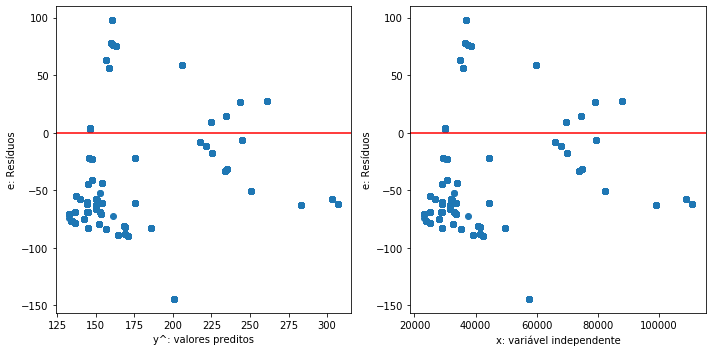

In [57]:
#  Calcula os valores preditos a partir da matriz de 1s e de x_dados
y_predito = results.predict(X_dados)



fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(y_predito, results.resid); #X_dados contem matriz de planejamento usada no ajuste OLS
plt.axhline(y=0, color='r', linestyle='-');
plt.ylabel('e: Resíduos')
plt.xlabel('y^: valores preditos')



plt.subplot(122)
plt.scatter(x_dados, results.resid); #x_dados contem apenas a variável independente utilizada no ajuste linear
plt.axhline(y=0, color='r', linestyle='-');
plt.ylabel('e: Resíduos')
plt.xlabel('x: variável independente')



plt.tight_layout()
plt.show()